# Anatomy of a cranked wing

— Agostino De Marco, <font color='darkblue'><i>University of Naples Federico II, Dept. Industrial Engineering</i></font>

We will use the Python language to work out our examples, so we set up some Python tools first.

In [35]:
# Set up the notebook and import required Python packages
%run ./src/cranked_wing/init.py
%matplotlib inline

The nomenclature.

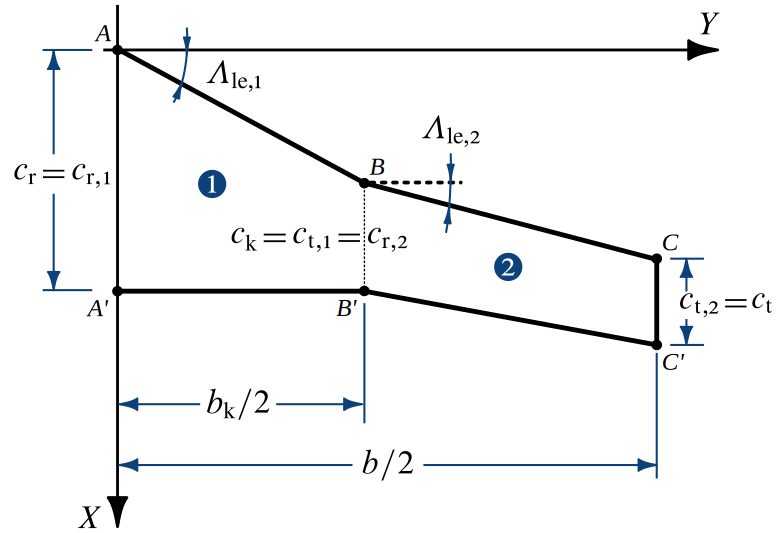

In [36]:
SVG(filename='./resources/cranked_wing_WEB.svg')

Examples of use of such a wing concept in actual wing configurations.

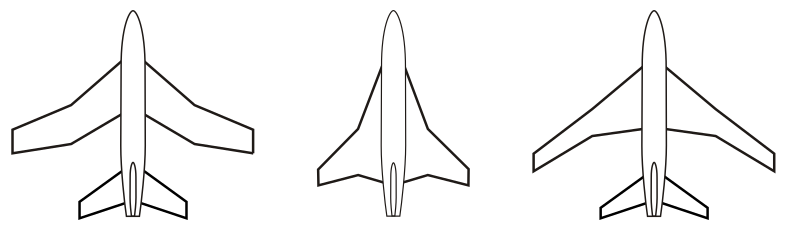

In [37]:
SVG(filename='./resources/Cranked_Wing_Examples.svg')

In [38]:
Wing data.

SyntaxError: invalid syntax (<ipython-input-38-f2b241dfb2d9>, line 1)

In [ ]:
c_r = 5.5; c_k = 2.4; c_t = 1.5; 
b_k = 14.0; b = 28
Lambda_le_1 = 24*math.pi/180; Lambda_le_2 = 24*math.pi/180

In [ ]:
Latex(
    r'\begin{array}{rl}'
    +  r'\text{root chord,}\, c_{\mathrm{r}}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{kink chord,}\, c_{\mathrm{k}}: & ' + r'{0}'.format(c_k) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{tip chord,}\, c_{\mathrm{t}}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan, inner panel}\, \frac{1}{2}b_{\mathrm{k}}: & ' + r'{0}'.format(b_k/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan,}\, \frac{1}{2}b: & ' + r'{0}'.format(b/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{leading edge sweep, inner panel,}\, \Lambda_{\mathrm{le},1}: &' 
    +    r'{0}'.format(Lambda_le_1*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{leading edge sweep, outer panel,}\, \Lambda_{\mathrm{le},2}: &' 
    +    r'{0}'.format(Lambda_le_2*180/math.pi) + r'\,\text{deg}'
    +r'\end{array}'
)

Wing platform.

In [ ]:
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

### The law of the chords, $c(y)$

The function $c(y)$ is the piecewise linear law that gives the chord at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
c(y) = 
\begin{cases}
A_{c,1} y + B_{c,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{c,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{c} = 
\begin{cases}
A_{c,1} = \dfrac{2}{b_{\mathrm{k}}} \left( c_{\mathrm{k}} - c_{\mathrm{r}} \right)  
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} = \dfrac{2}{b - b_{\mathrm{k}}} \left( c_{\mathrm{t}} - c_{\mathrm{k}} \right)  
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{c} = 
\begin{cases}
B_{c,1} = c_{\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{c,2} = c_{\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

The following code defines function $c(y)$ calculating the above two coefficients:

In [ ]:
# c(y)
def f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    if y >= 0 and y <= b_k/2:
        A_ = 2*(c_k - c_r)/b_k; B_ = c_r;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (c_t - c_k)/(b/2 - b_k/2); B_ = c_k;
        return A_*(y - b_k/2) + B_
    
def f_chord_1(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = 2*(c_k - c_r)/b_k; B_ = c_r;
    return A_*y + B_

def f_chord_2(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = (c_t - c_k)/(b/2 - b_k/2); B_ = c_k;
    return A_*(y - b_k/2) + B_

In [ ]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    ymax = 7, ymin = -4.5,
                    figsize = (11,5), vshift_xaxis=20,
                    f_chord = f_chord)

### The law of the leading edge positions, $X_{\mathrm{le}}(y)$

The function $X_{\mathrm{le}}(y)$ is the piecewise law that gives the local leading edge longitudinal coordinate at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
X_{\mathrm{le}}(y) = 
\begin{cases}
A_{X_{\mathrm{le}},1} \, y + B_{X_{\mathrm{le}},1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{X_{\mathrm{le}},2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{X_{\mathrm{le}},2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{X_{\mathrm{le}}} = 
\begin{cases}
A_{X_{\mathrm{le}},1} = \tan \Lambda_{\mathrm{le},1}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{X_{\mathrm{le}},2} = \tan \Lambda_{\mathrm{le},2}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{X_{\mathrm{le}}} = 
\begin{cases}
B_{X_{\mathrm{le}},1} = 0 \, \mathrm{m}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{X_{\mathrm{le}},2} = \frac{1}{2} b_{\mathrm{k}} \, \tan \Lambda_{\mathrm{le},1}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

In [ ]:
# X_le(y)
def f_Xle(y, b_k, b, Lambda_le_1, Lambda_le_2):
    if y >= 0 and y <= b_k/2:
        A_ = math.tan(Lambda_le_1);
        return A_*y
    elif y > b_k/2 and y <= b/2:
        A_ = math.tan(Lambda_le_2);
        return (b_k/2)*math.tan(Lambda_le_1) + A_*(y - b_k/2)
    
def f_Xle_1(y, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = math.tan(Lambda_le_1);
    return A_*y
    
def f_Xle_2(y, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = math.tan(Lambda_le_2);
    return (b_k/2)*math.tan(Lambda_le_1) + A_*(y - b_k/2)

In [ ]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    ymax = 10, ymin = -4.5,
                    figsize = (11,5), vshift_xaxis=20,
                    f_chord = f_chord,
                    f_Xle = f_Xle)

### Calculate $S$, $\bar{c}$, $X_{\mathrm{le},\bar{c}}$, and $Y_{\bar{c}}$

The reference surface:

\begin{equation}
S = 2 \int_{0}^{b/2} c(y) \, \mathrm{d}y
\end{equation}

In [ ]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    ymax = 7, ymin = -1.5,
                    figsize = (11,5), vshift_xaxis=40,
                    f_S_integral = f_chord)

The planform area is calculated by quadrature of the function $c(y)$. In Python this is done via the package SciPy.

In [ ]:
%run ./src/cranked_wing/init.py
# Definite integral via scipy
S_ref_ = scipy.integrate.quad(
    f_chord, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
# print(S_ref_)
S_ref = 2*S_ref_[0]
print('S = {0} m^2'.format(S_ref))

The mean aerodynamic chord:

\begin{equation}
\bar{c} = \frac{2}{S} \int_{0}^{b/2} c^2(y) \, \mathrm{d}y
\end{equation}

In [ ]:
# c^2(y)
def f_chord_squared(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    return f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)**2

In [ ]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 20, 
                    ymax = 1.1*c_r**2, ymin = -5,
                    figsize = (11,5), vshift_xaxis=40,
                    f_S_integral = f_chord,
                    f_mac_integral = f_chord_squared)

The mean aerodynamic chord is calculated by quadrature of the function $c^2(y)$.

In [ ]:
%run ./src/cranked_wing/init.py
# Definite integral via scipy
c_mac_ = scipy.integrate.quad(
    f_chord_squared, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print(c_mac_)
c_mac = (2/S_ref)*c_mac_[0]
print('mac = {0} m'.format(c_mac))

The mean aerodynamic chord leading edge:

\begin{equation}
X_{\mathrm{le},\bar{c}} = \frac{2}{S} \int_{0}^{b/2} X_{\mathrm{le}}(y) \, c(y) \, \mathrm{d}y
\end{equation}

In [ ]:
# X_le(y) * c(y)
def f_Xle_c(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    return f_Xle(y, b_k, b, Lambda_le_1, Lambda_le_2)*f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

In [ ]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 30, 
                    ymax = 13, ymin = -2,
                    figsize = (11,5), vshift_xaxis=40,                    
                    f_Xle_mac_integral = f_Xle_c)

The coordinate $X_{\mathrm{le},\bar{c}}$ of the function $X_{\mathrm{le}}(y)\,c(y)$.

In [ ]:
%run ./src/cranked_wing/init.py
# Definite integral via scipy
X_le_mac_ = scipy.integrate.quad(
    f_Xle_c, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print(X_le_mac_)
X_le_mac = (2/S_ref)*X_le_mac_[0]
print('X_le_mac = {0} m'.format(X_le_mac))

The mean aerodynamic chord spanwise location:

\begin{equation}
Y_{\bar{c}} = \frac{2}{S} \int_{0}^{b/2} y \, c(y) \, \mathrm{d}y
\end{equation}

In [ ]:
# y * c(y)
def f_y_c(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    return y*f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

In [ ]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 20, 
                    ymax = 33, ymin = -7,
                    figsize = (11,5), vshift_xaxis=40,                    
                    f_Xle_mac_integral = f_Xle_c,
                    f_Y_mac_integral = f_y_c)

In [ ]:
%run ./src/cranked_wing/init.py
# Definite integral via scipy
Y_mac_ = scipy.integrate.quad(
    f_y_c, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print(Y_mac_)
Y_mac = (2/S_ref)*Y_mac_[0]
print('Y_mac = {0} m'.format(Y_mac))

In [ ]:
# %run ./src/aerodynamic_center_wing/init.py
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, 
              mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac)

## TODO: fix the part below

### The laws of geometric twist $\epsilon_{\mathrm{g}}(y)$ and of profile zero-lift angle of attack $\alpha_{0\ell}(y)$

The function $\epsilon_{\mathrm{g}}(y)$ is the piecewise law that gives the geometric twist of the wing sectiont at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
\epsilon_{\mathrm{g}}(y) = 
\begin{cases}
A_{\epsilon,1} \, y + B_{\epsilon,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\epsilon,2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{\epsilon,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{\epsilon} = 
\begin{cases}
A_{\epsilon,1} = \dfrac{2}{b_{\mathrm{k}}}\, \epsilon_{\mathrm{g,k}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\epsilon,2} = \dfrac{2}{b - b_{\mathrm{k}}}\, \big( \epsilon_{\mathrm{g,t}} - \epsilon_{\mathrm{g,k}} \big)
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{\epsilon} = 
\begin{cases}
B_{\epsilon,1} = 0 \, \mathrm{rad}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{\epsilon,2} = \epsilon_{\mathrm{g,k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

Let us assign the geometric twist at kink and tip sections:

In [ ]:
eps_k = 0*math.pi/180
eps_t = -2.0*math.pi/180

The following code defines function $\epsilon_{\mathrm{g}}(y)$ calculating the above two coefficients:

In [ ]:
# eps_g(y)
def f_twist(eps_k, eps_t, b_k, b, y):
    if y >= 0 and y <= b_k/2:
        A_ = 2*eps_k/b_k; B_ = 0;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (eps_t - eps_k)/(b/2 - b_k/2); B_ = eps_k;
        return A_*(y - b_k/2) + B_
    
def f_twist_1(eps_k, eps_t, b_k, b, y):
    A_ = 2*eps_k/b_k; B_ = 0;
    return A_*y + B_

def f_twist_2(eps_k, eps_t, b_k, b, y):
    A_ = (eps_t - eps_k)/(b/2 - b_k/2); B_ = eps_k;
    return A_*(y - b_k/2) + B_

The function $\alpha_{0\ell}(y)$ is the piecewise law that gives the zero-lift angle of attack of the wing sectiont at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
\alpha_{0\ell}(y) = 
\begin{cases}
A_{\alpha,1} \, y + B_{\alpha,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\alpha,2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{\alpha,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{\alpha} = 
\begin{cases}
A_{\alpha,1} = \dfrac{2}{b_{\mathrm{k}}}\, \alpha_{0\ell,\mathrm{k}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\alpha,2} = \dfrac{2}{b - b_{\mathrm{k}}}\, \big( \alpha_{0\ell,\mathrm{t}} - \alpha_{0\ell,\mathrm{k}} \big)
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{\alpha} = 
\begin{cases}
B_{\alpha,1} = \alpha_{0\ell,\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{\alpha,2} = \alpha_{0\ell,\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

Let us assign the profile zero-lift alpha at root, kink and tip sections:

In [ ]:
alpha0l_r = -3.0*math.pi/180
alpha0l_k = -3.0*math.pi/180
alpha0l_t = -2.0*math.pi/180

The following code defines function $\alpha_{0\ell}(y)$ calculating the above two coefficients:

In [ ]:
# alpha0l(y)
def f_alpha0l(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    if y >= 0 and y <= b_k/2:
        A_ = 2*(alpha0l_k - alpha0l_r)/b_k; B_ = alpha0l_r;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_ = alpha0l_k;
        return A_*(y - b_k/2) + B_
    
def f_alpha0l_1(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    A_ = 2*(alpha0l_k - alpha0l_r)/b_k; B_ = alpha0l_r;
    return A_*y + B_

def f_alpha0l_2(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    A_ = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_ = alpha0l_k;
    return A_*(y - b_k/2) + B_

## Wing functions

The following code defines function $\epsilon_{\mathrm{g}}(y)$ calculating the above two coefficients:

## Wing functions

## The wing zero-lift angle of attack $\alpha_{0L,\mathrm{W}}$

The zero-lift angle of attack is given by the following formula:

\begin{equation}
\alpha_{0L,\mathrm{W}} 
  = \frac{2}{S} \int_0^{b/2} 
    \big[\alpha_{0\ell}(y) - \epsilon_{\mathrm{g}}(y)\big]
    c(y) \, \mathrm{d}y
\end{equation}

where the functions $c(y)$, $\alpha_{0\ell}(y)$, and $\epsilon_{\mathrm{g}}(y)$ are the piecewise linear functions defined above.

Let us resolve the above integral with the aid of Python and the package SymPy.

In [ ]:
# %run ./src/cranked_wing/init.py
#plot_wing_functions(c_r, c_k, c_t, 
#                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
#                    b_k, b, Lambda_le_1, Lambda_le_2, 
#                    f_chords, f_Xle, f_twist, f_alpha0l,
#                    f_alpha0L_integral_indefinite = alpha0L_law_integral_indefinite)

The definite integral is:

In [ ]:
# definite integral
# alpha0L = (2/S_ref)*(alpha0L_law_integral_indefinite.subs(y,b/2) - alpha0L_law_integral_indefinite.subs(y,0))

#print('alpha_0L = {0} rad'.format(alpha0L))
#print('alpha_0L = {0} deg'.format(alpha0L*180/math.pi))

## TODO: check the above result

In [ ]:
%run ./src/cranked_wing/init.py

# http://stackoverflow.com/questions/26106833/save-workspace-in-ipython
# %run ./src/save_user_variables.py

print(f_chord(3, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
    
# https://docs.python.org/3.5/library/shelve.html
import shelve
store = shelve.open('cranked_wing_store', flag='n')
store['c_r'] = c_r
store['c_k'] = c_k
store['c_t'] = c_t
store['b_k'] = b_k
store['b'] = b
store['Lambda_le_1'] = Lambda_le_1
store['Lambda_le_2'] = Lambda_le_2
store['S_ref'] = S_ref
store['c_mac'] = c_mac
store.close()

# https://www.quora.com/Can-lambda-functions-and-other-Python-code-be-pickled
# import cloudpickle
# blob = cloudpickle.dumps(f_chord)